In [46]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../'))
from scipy.io import loadmat
import loaders
from preprocessing.vsdi_preprocessing import clean_outliers,pca_ica,glm
from pathlib import Path
import matplotlib.pyplot as plt

In [47]:
# load footprints and masks

data_path = Path('/scratch/dspalla/ATC_analysis')
animals = ['A04','A06','A07','A08']

footprints = {}
masks = {}
for animal in animals:
    footprints[animal] = np.load(data_path.joinpath(f'footprints_{animal}.npy'))
    masks[animal] = np.load(data_path.joinpath(f'mask_total_{animal}.npy'))


/tmp/ipykernel_3067112/2234028467.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,10,i+1)


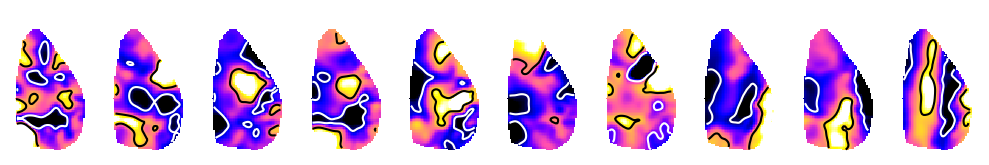

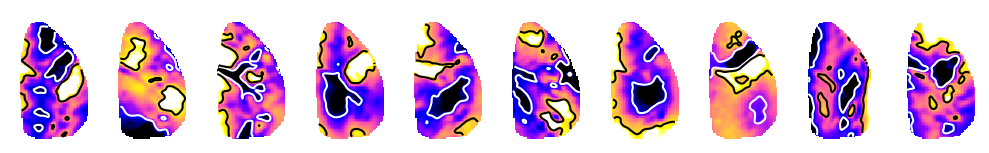

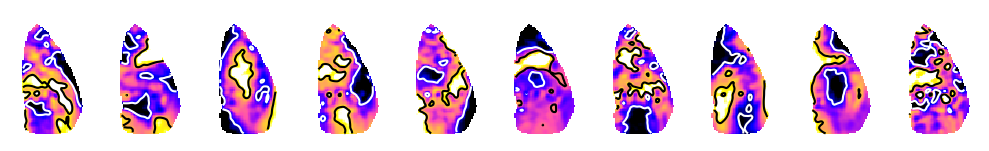

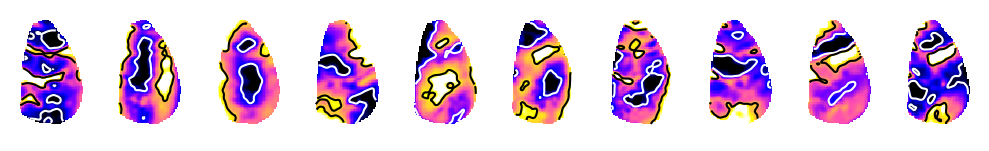

In [54]:
for animal in footprints.keys():
    plt.figure(figsize=(10,5))
    plt.title(f'animal {animal}')
    for i,f in enumerate(footprints[animal]):
        ax = plt.subplot(1,10,i+1)
        
        xmin = np.nanpercentile(f.ravel(),5)
        xmax = np.nanpercentile(f.ravel(),95)
        x1 = np.nanpercentile(f.ravel(),15)
        x2 = np.nanpercentile(f.ravel(),85)
        
        mask = masks[animal].astype(bool)
        f[np.where(mask==0)] = np.nan
        ax.matshow(f,cmap=plt.cm.gnuplot2,vmin=xmin,vmax=xmax)
        
        
        
        ax.contour(f,[x1,x2],colors= ['w','k'])
        
        
        plt.axis('off')
        
   
    plt.tight_layout()
    